In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import  precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import unidecode

In [5]:
df_clarin = pd.read_csv('tools/big_clarin.csv')
df_destape = pd.read_csv('tools/eldestapeweb.csv')
stopwords = pd.read_csv('tools/stopwords.csv', header= None)


In [6]:
df_clarin = df_clarin[pd.notnull(df_clarin['articleBody'])]
df_destape = df_destape[pd.notnull(df_destape['articleBody'])]

In [7]:
df_clarin['diario'] = 'clarin'
df_destape['diario'] = 'destape'

In [8]:
df_destape.head()

,articleBody,bajada,headline,link,section,source,volanta,diario
0,La ex presidenta y candidata a senadora de Uni...,La ex presidenta y candidata a senadora de Uni...,El cantito contra Clarín en medio del discurso...,http://www.eldestapeweb.com//el-fuerte-pedido-...,Política,eldestapeweb,Elecciones 2017,destape
1,Durante el discurso de la candidata a senadora...,Un fuerte repudio contra el grupo de medios má...,"El fuerte pedido de Cristina por Maldonado: ""T...",http://www.eldestapeweb.com//el-cantito-contra...,Política,eldestapeweb,Elecciones 2017,destape
2,Tras las elecciones legislativas de la semana ...,Crecen los rumores en torno a la posible desvi...,ESCÁNDALO | Empresario clave reveló el porcent...,http://www.eldestapeweb.com//macri-ya-tendria-...,Política,eldestapeweb,Macri Presidente,destape
3,Con un encendido discurso que apuntó a interpe...,La candidata a senadora cerró su campaña de ca...,"El fuerte pedido de Cristina por Maldonado: ""T...",http://www.eldestapeweb.com//las-10-frases-mas...,Política,eldestapeweb,Elecciones 2017,destape
4,Con un encendido discurso que apuntó a interpe...,"En medio de su discurso, la candidata a senado...","El fuerte pedido de Cristina por Maldonado: ""T...",http://www.eldestapeweb.com//el-calculo-matema...,Política,eldestapeweb,Elecciones 2017,destape


In [9]:
stopwords_list = stopwords[0].values
stopwords_list = list(stopwords_list)

In [10]:
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

In [11]:
def text_stemmer(text):
    texto = text.lower()
    unaccented_string = unidecode.unidecode(texto)
    stripped = re.sub('[^a-z0-9]+', ' ', unaccented_string).lstrip()
    stemmed = " ".join([stemmer.stem(x) for x in stripped.split(' ')])
    return stemmed

In [12]:
#Esto tarda bastante
df_clarin['articleBody2'] = df_clarin["articleBody"].apply(text_stemmer)
df_destape['articleBody2'] = df_destape["articleBody"].apply(text_stemmer)

In [57]:
df_clarin.groupby('section')['articleBody'].count()

section
ARQ                      4
Autos                    1
Buena Vida               1
Cartas al pais          21
Ciudades               116
Clarín em Portugues      2
Cultura                 68
Deportes               270
Economía               157
Entremujeres             4
Entremujeres México      4
Espacio Clarín          14
Espectáculos           292
Mundo                  175
Noticias                 6
Opinión                 48
Policiales             114
Política               498
Revista Ñ               19
Rural                    7
Sociedad               262
Tecnología               7
Viajes                   3
Viva                     4
WebTV                    1
Name: articleBody, dtype: int64

In [58]:
df_destape.groupby('section')['articleBody'].count()

section
AFA                                1
Aborto                             1
Alejandro Fantino                  4
Aumentos                           1
Automovilismo                      1
Beisbol                            1
Boca Juniors                       1
Campo                              1
Cecilia Pando                      1
Chubut                             1
Ciclismo                           1
Cine                               1
Ciudad                             1
Colegio Nacional Buenos Aires      1
Consumo                            1
Corte Suprema de Justicia          1
Cristina Kirchner                  4
Cultura                            5
Despidieron a Navarro              3
Diego Latorre                      1
Diego Maradona                     2
Economia                          87
Editorial                          1
Educación                          1
Elecciones 2017                    1
Elisa Carrió                       1
Energía                       

In [56]:
df_clarin.sample(5)

,Unnamed: 0,articleBody,bajada,date,headline,section,volanta,diario,articleBody2
485,485,El cuñado prófugo del ex ministro de Planifica...,Fue en Chapadmalal y no ofreció resistencia. E...,2017-08-06 19:03:28.340420,"Detuvieron a Claudio ""Mono"" Minnicelli, el cuñ...",Política,La mafia de los contenedores,clarin,el cun profug del ex ministr de planificacion ...
590,590,Si bien la mujer aún está lejos del nivel de c...,Es porque en general están a cargo de sus hijo...,2017-07-22 19:10:37.419110,Mujeres adictas: muy pocas piden ayuda y dejan...,Sociedad,Desigualdad de género,clarin,si bien la muj aun esta lej del nivel de consu...
859,859,Apesar de la sangría que sufrió desde que Cris...,El kirchnerismo espera retener la mayor parte ...,2017-06-17 19:27:09.367677,Cristina Kirchner arma internas en las provinc...,Política,Elecciones 2017,clarin,apes de la sangri que sufri desd que cristin k...
888,888,El desborde del arroyo Aguapey provocó el domi...,Son diferentes tramos que dejan localidades in...,2017-06-12 19:29:30.227135,Por las inundaciones todavía hay cinco rutas n...,Sociedad,Un problema crónico que desnuda la falta de ob...,clarin,el desbord del arroy aguapey provoc el doming ...
1055,1055,En la segunda jornada del juicio oral contra e...,Lo contó una de las mujeres que era explotada ...,2017-05-23 19:39:03.898504,"El relato de una de las víctimas de trata: ""No...",Sociedad,Juicio contra un intendente de La Pampa,clarin,en la segund jorn del juici oral contr el inte...


In [14]:
#Para comparar todas las secciones comentar esto
df_politica_destape = df_destape[(df_destape.section == 'Política') | (df_destape.section == 'PolÃ\xadtica')]
df_politica_clarin = df_clarin[(df_clarin.section == 'Política')]
df = pd.concat([df_politica_clarin,df_politica_destape])

In [15]:
X = df['articleBody2']
y = df['diario']

In [61]:
print(np.max(list(map(lambda x: len(x), X))))
print(np.mean(list(map(lambda x: len(x), X))))
print(np.min(list(map(lambda x: len(x), X))))

12587
2047.83770076
281


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [17]:
#Vectorizar 
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(strip_accents= 'ascii', stop_words= stopwords_list)
count_vect.fit(X_train)
X_train_counts = count_vect.transform(X_train)

X_train_counts.shape

(792, 12538)

In [18]:
#frecuencia por palabra (por alguna razon funciona peor el TDiDF)
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf = TfidfVectorizer(strip_accents= 'ascii', stop_words= stopwords_list)
#tfidf.fit(X_train)
#X_train_tfidf = tfidf.transform(X_train)

#X_train_tfidf.shape

In [19]:
X_test_counts = count_vect.transform(X_test)
#X_test_tfidf = tfidf.transform(X_test)


In [26]:
def get_report(test_features,test_target,model, model_name):
    y_pred = model.predict_proba(test_features)
    y_pred_abs = model.predict(test_features)
    Ytest = list(map(lambda x : 1 if(x == "destape") else 0,test_target))
    fpr_log,tpr_log,thr_log = roc_curve(Ytest, y_pred[:,1])
    df_aux = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
    print("--------------REPORT MODEL {}--------------\n".format(model_name))
    plt.axis([0, 1.01, 0, 1.01])
    plt.xlabel('1 - Specificty')
    plt.ylabel('TPR / Sensitivity')
    plt.title('ROC Curve')
    plt.plot(df_aux['fpr'],df_aux['tpr'])
    plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
    plt.show() 
    print("Roc Auc: {}".format(roc_auc_score(Ytest,y_pred[:,1])))
    print("\n Classification Report: \n")
    print(classification_report(test_target,y_pred_abs))
    print("\n Classification Report: \n")
    print(confusion_matrix(test_target, y_pred_abs))
    print("-------------------------------------------\n")

### Multinomial Naive Bayes

In [21]:
model_multinb = MultinomialNB().fit(X_train_counts, y_train)
y_pred_multinb = model_multinb.predict(X_test_counts)

print('Accuracy Multi NB: ',accuracy_score(y_pred_multinb, y_test))

Accuracy Multi NB:  0.892583120205


In [22]:
df_results = pd.DataFrame(X_test)
df_results['Prediction'] = y_pred_multinb


--------------REPORT MODEL Multinomial Naive Bayes--------------



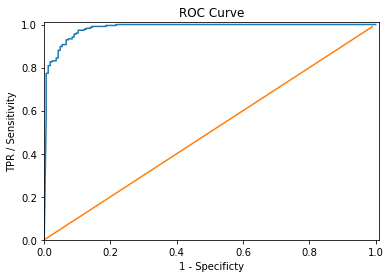

Roc Auc: 0.9831994645247657

 Classification Report: 

             precision    recall  f1-score   support

     clarin       0.82      0.96      0.88       166
    destape       0.96      0.84      0.90       225

avg / total       0.90      0.89      0.89       391


 Classification Report: 

[[159   7]
 [ 35 190]]
-------------------------------------------



In [27]:
get_report(X_test_counts,y_test,model_multinb, "Multinomial Naive Bayes")

### KNN

In [29]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_counts,y_train)
y_pred_knn = model_knn.predict(X_test_counts)
print('Accuracy KNN: ',accuracy_score(y_pred_knn, y_test))

Accuracy KNN:  0.843989769821


In [30]:
# Calculamos nuevamente los scores de cross validation, pero esta vez sobre los features estandarizados
X_counts = count_vect.transform(X)
from sklearn.model_selection import cross_val_score
scores_para_df_standar = []
for i in range(1,100,5):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(model_knn, X_counts, y, cv=5)
    dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}
    scores_para_df_standar.append(dict_row_score)

In [31]:
df_scores_standar = pd.DataFrame(scores_para_df_standar)
df_scores_standar.sort_values(by="score_medio",ascending=False).head(5)

,n_neighbours,score_medio,score_std
1,6,0.850336,0.025864
3,16,0.846092,0.034168
2,11,0.842705,0.038035
4,21,0.839319,0.039597
5,26,0.837639,0.032364


In [32]:
# Armamos nuevamente los límites para graficar
df_scores_standar['limite_superior'] = df_scores_standar['score_medio'] + df_scores_standar['score_std']
df_scores_standar['limite_inferior'] = df_scores_standar['score_medio'] - df_scores_standar['score_std']

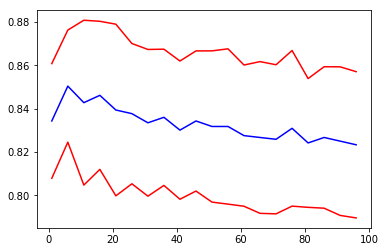

In [33]:
# Buscamos gráficamente el valor ópitmo para n_neighbors
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_inferior'],color='r')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['score_medio'],color='b')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_superior'],color='r');

In [34]:
model_knn = KNeighborsClassifier(n_neighbors=6)
model_knn.fit(X_train_counts,y_train)
y_pred_knn = model_knn.predict(X_test_counts)
print('Accuracy KNN: ',accuracy_score(y_pred_knn, y_test))

Accuracy KNN:  0.854219948849


--------------REPORT MODEL KNN (n = 6)--------------



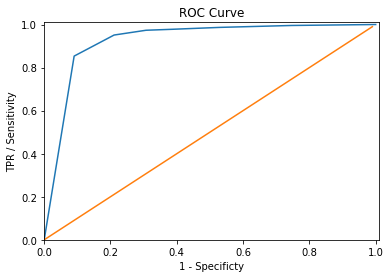

Roc Auc: 0.9257965194109772

 Classification Report: 

             precision    recall  f1-score   support

     clarin       0.95      0.69      0.80       166
    destape       0.81      0.97      0.88       225

avg / total       0.87      0.85      0.85       391


 Classification Report: 

[[115  51]
 [  6 219]]
-------------------------------------------



In [35]:
get_report(X_test_counts,y_test,model_knn, "KNN (n = 6)")

### SVM

In [36]:
svc_C = [1, 5, 10, 50]
svc_gamma = [0.0001, 0.0005, 0.001, 0.005]
for c in svc_C:
    for g in svc_gamma:
        model_svm = SVC(kernel='rbf', class_weight='balanced', C=c, gamma = g)
        print (np.mean(cross_val_score(model_svm,X_train_counts,y_train,cv=5)),' gamma:',g,' C:',c)

0.883854788631  gamma: 0.0001  C: 1
0.910397261365  gamma: 0.0005  C: 1
0.90913143858  gamma: 0.001  C: 1
0.854844359526  gamma: 0.005  C: 1
0.917968314625  gamma: 0.0001  C: 5
0.933110421145  gamma: 0.0005  C: 5
0.928039168856  gamma: 0.001  C: 5
0.862407451636  gamma: 0.005  C: 5
0.935642066714  gamma: 0.0001  C: 10
0.938157789985  gamma: 0.0005  C: 10
0.930570814426  gamma: 0.001  C: 10
0.862407451636  gamma: 0.005  C: 10
0.938149828835  gamma: 0.0001  C: 50
0.93942361277  gamma: 0.0005  C: 50
0.930570814426  gamma: 0.001  C: 50
0.862407451636  gamma: 0.005  C: 50


In [37]:
model_svm = SVC(kernel='rbf', class_weight='balanced', C=50, gamma = 0.0001)
model_svm.fit(X_train_counts,y_train)
y_pred_svm = model_svm.predict(X_test_counts)
print('Accuracy SVM: ',accuracy_score(y_pred_svm, y_test))

Accuracy SVM:  0.964194373402


### Regresión Logística

In [38]:
model_log = LogisticRegression(C=0.1)
model_log.fit(X_train_counts, y_train)
y_pred_log = model_log.predict(X_test_counts)
print('Accuracy Logistic Regression: ',accuracy_score(y_pred_log, y_test))

Accuracy Logistic Regression:  0.961636828645


In [39]:
df_results = pd.DataFrame(X_test)
df_results['Prediction'] = y_pred_log
df_results.head(10)

,articleBody2,Prediction
406,la ministr de segur patrici bullrich asegur qu...,destape
290,sergi maldon afirm este lun que tien esper de ...,destape
189,la ex president cristin kirchn fue categor al ...,destape
559,las escuch ilegal entre cristin kirchn y oscar...,destape
736,com gerent del banc de sant cruz lazar baez in...,clarin
1349,el gobiern de la provinci de buen air notif ay...,clarin
337,la secretari general de la asociacion del magi...,clarin
682,a los poc dias de desaparec a santiag maldon l...,destape
859,apes de la sangri que sufri desd que cristin k...,clarin
449,milagr sal esta cad vez mas cerc de abandon el...,clarin


In [41]:
df_results.to_csv('output/predictions.csv')

--------------REPORT MODEL Regresión Logística (C = 0.1)--------------



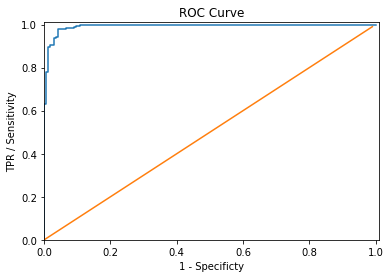

Roc Auc: 0.9926639892904953

 Classification Report: 

             precision    recall  f1-score   support

     clarin       0.97      0.94      0.95       166
    destape       0.96      0.98      0.97       225

avg / total       0.96      0.96      0.96       391


 Classification Report: 

[[156  10]
 [  5 220]]
-------------------------------------------



In [42]:
get_report(X_test_counts,y_test,model_log, "Regresión Logística (C = 0.1)")

### Esto es extra. Intentando clasificar el sesgo politico entre clarin y destape y luego clasificar en p12

In [43]:
#df_clarin_prueba = pd.read_csv('tools/clarin.csv')
df_p12 = pd.read_csv('tools/pagina12.csv')

In [44]:
df_p12 = df_p12[df_p12['cuerpo'].notnull()].copy()
df_p12.suplemento.unique()

array([nan, 'El país', 'El mundo', 'Sociedad', 'Deportes', 'Contratapa',
       'Economía', 'Universidad', 'Plástica'], dtype=object)

In [52]:
df_p12_section = df_p12[df_p12.suplemento == 'Economía']

In [53]:
df_p12_section['cuerpo2'] = df_p12_section["cuerpo"].apply(text_stemmer)
X_p12 = df_p12_section['cuerpo2'].copy()
df_p12_section.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 67 to 138
Data columns (total 9 columns):
Unnamed: 0    17 non-null int64
cuerpo        17 non-null object
fecha_hora    17 non-null object
imagen        17 non-null object
resumen       10 non-null object
suplemento    17 non-null object
titulo        17 non-null object
url           17 non-null object
cuerpo2       17 non-null object
dtypes: int64(1), object(8)
memory usage: 1.3+ KB


/Users/lionelchamorro/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [54]:
X_test_counts = count_vect.transform(X_p12)
y_pred_svm = model_log.predict(X_test_counts)
y_pred_svm

array(['clarin', 'destape', 'clarin', 'destape', 'destape', 'clarin',
       'clarin', 'destape', 'destape', 'clarin', 'clarin', 'destape',
       'destape', 'destape', 'destape', 'clarin', 'destape'], dtype=object)

In [55]:
y_test_destape = ['destape']*len(y_pred_svm)
print('Accuracy model_log: ',accuracy_score(y_pred_svm, y_test_destape))

Accuracy model_log:  0.588235294118


In [49]:
df_results = pd.DataFrame(X_p12)
df_results['Prediction'] = y_pred_svm
df_results.head(10)

,cuerpo2,Prediction
1,los comici par eleg gobern en corrient cerr pa...,destape
5,en un nuev acto de campan esta vez en malvin a...,destape
6,siganl busc fue la cinic respuest de dos agent...,clarin
7,esta manan el gobern correntin ricard colombi ...,destape
9,el viern por la noch milagr sal fue notific de...,destape
70,en su inform la fundacion soberani sanitari se...,destape
71,mientr crec la emergent en los hospital public...,clarin
72,no pued ser que la logic sea que cad gobiern t...,clarin
73,necesit gan a cristin fernandez de kirchn ese ...,clarin
74,desd corrient al cierr de esta edicion la alia...,clarin


In [41]:
df_results.to_csv('output/predictions_p12.csv')

In [71]:
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(X_train_counts,y_train)
y_pred_knn = model_knn.predict(X_test_counts)
print(y_pred_knn)
X_test_counts = count_vect.transform(X_p12)
y_test_destape = ['destape']*len(y_pred_knn)
print('Accuracy model_log: ',accuracy_score(y_pred_knn, y_test_destape))

['clarin' 'clarin' 'clarin' 'destape' 'destape' 'destape' 'destape'
 'destape' 'destape' 'destape' 'destape' 'destape' 'destape' 'destape'
 'destape' 'destape' 'clarin']
Accuracy model_log:  0.764705882353
